In [1]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

In [2]:
usePackage('ggplot2')
usePackage('dplyr')
usePackage('GGally')
usePackage('matlib')
usePackage("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘RcppEigen’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘rgl’, ‘car’


Warning message in install.packages(p, repos = "https://cran.itam.mx/"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages(p, repos = "https://cran.itam.mx/"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages(p, repos = "https://cran.itam.mx/"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages(p, repos = "https://cran.itam.mx/"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages(p, repos = "https://cran.itam.mx/"):
“installation of package ‘matlib’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘lazyeval’, ‘cr

In [3]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


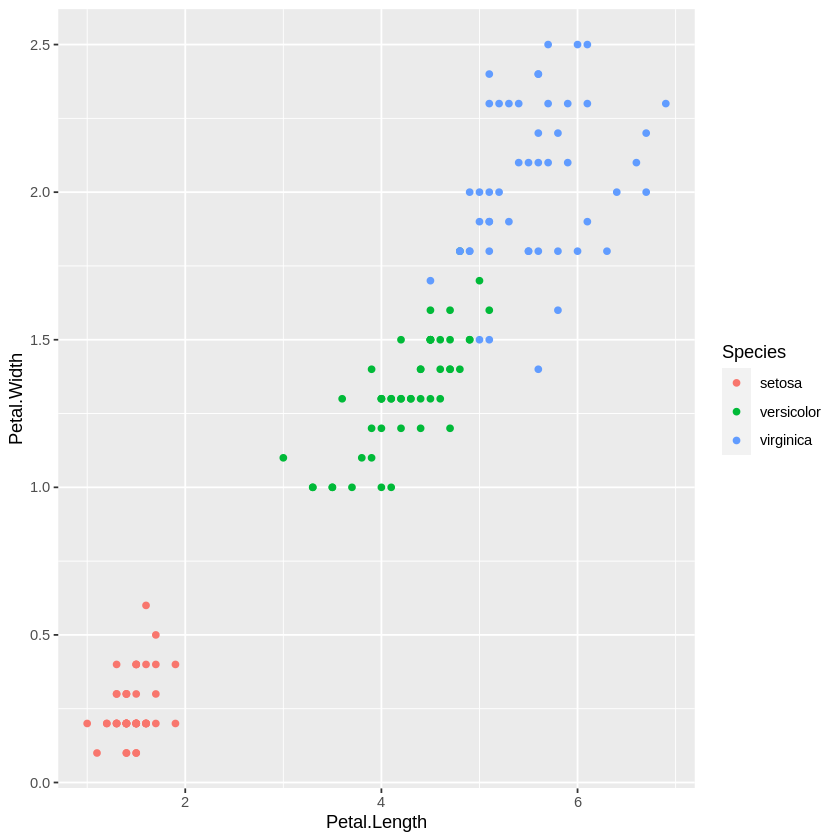

In [4]:
ggplot(iris) + geom_point(aes(y=Petal.Width, x=Petal.Length, color=Species))

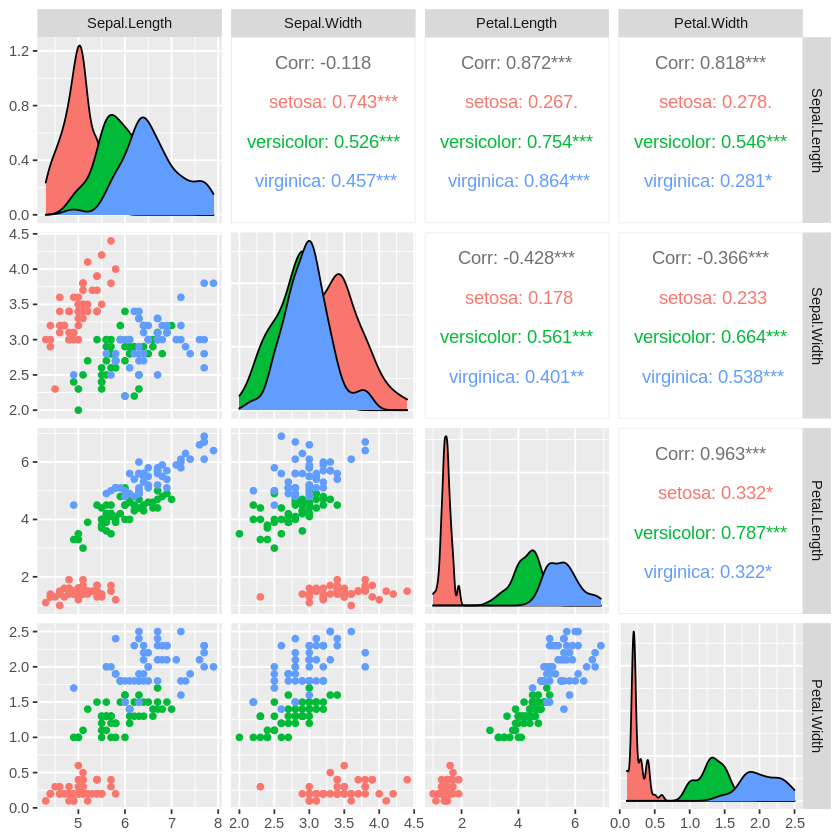

In [5]:
iris %>% 
     select(-Species) %>% 
     ggpairs(aes(color=iris$Species))

**1) Calculo de Probabilidad A Priori**

In [6]:
apriori <- function(df, target, clase){
    sub <- subset(df, df[target] == clase) 
    return(nrow(sub)/nrow(df))
}

In [7]:
ap <- apriori(iris, "Species", "versicolor")

**2)Cálculo de Media**

In [8]:
media <- function(df, target, features, clase){
    s_set <- subset(df, df[target] == clase)
    return (sapply(features, function(col) mean(s_set[,col])))
}

In [9]:
media(iris, "Species", c('Petal.Width','Petal.Length'), "setosa")

Petal.Width Petal.Length 
       0.246        1.462

**3)Cálculo de varianza y covarianza**

In [10]:

var.covar <- function(df, features, means){
    df<- df[,features]
    D <- as.matrix(df)-means
    N <- nrow(df)
    K <- dim(table(df$Species))
    denominador <- (N - K)
    C <- (t(D) %*% D) / denominador
    return (C)
}

In [11]:

medias <- media(iris, "Species",c('Petal.Width', 'Petal.Length'), c("versicolor","setosa", "virginica"))
vars <- var.covar(iris, c('Petal.Width', 'Petal.Length'), medias)
medias
vars

Petal.Width Petal.Length 
    1.154902     3.737255

,Petal.Width,Petal.Length
Petal.Width,3.848568,1.366681
Petal.Length,1.366681,6.530260


4) Cálculo del Discriminante

In [12]:
delta <- function(X, a_priori, means, var_cov){
    discriminante  <- as.numeric(t(X)%*% solve(var_cov) %*% means - 1/2* t(means) %*% solve(var_cov) %*% means + log(a_priori))
    return (discriminante)
}

In [13]:
features = c(1, 5)
delta(features, ap, medias, vars)

[1] 0.6691081

5) Clasificación

In [14]:
lista_versicolor <- list(apriori_ = apriori(iris, "Species", "versicolor"), media_ = media(iris, "Species", c("Petal.Width", "Petal.Length"), "versicolor"))
lista_setosa <- list(apriori_ = apriori(iris, "Species", "setosa"), media_ = media(iris, "Species", c("Petal.Width", "Petal.Length"), "setosa"))
lista_virginica <- list(apriori_ = apriori(iris, "Species", "virginica"), media_ = media(iris, "Species", c("Petal.Width", "Petal.Length"), "virginica"))

(lista <-  list(versicolor=lista_versicolor, setosa=lista_setosa, virginica=lista_virginica))

$versicolor
$versicolor$apriori_
[1] 0.3333333

$versicolor$media_
 Petal.Width Petal.Length 
       1.326        4.260 


$setosa
$setosa$apriori_
[1] 0.3333333

$setosa$media_
 Petal.Width Petal.Length 
       0.246        1.462 


$virginica
$virginica$apriori_
[1] 0.3333333

$virginica$media_
 Petal.Width Petal.Length 
       2.026        5.552

In [15]:
clasifica <- function(X, parametros, cov){
    probas_delta <- sapply(parametros, function(clase) delta(X, clase$apriori_, clase$media_, cov)) 
    result <- names(probas_delta)[which.max(probas_delta)]
    return (result)
}

In [16]:
clasifica(c(4,1), lista, vars)

[1] "setosa"

**Conclusión:**
No pudimos juntar todos los metodos para hacer las pruebas para varias variables, pero nuestros metodos individuales si funcionan entonces podemos asumir que de haberlas implementado de manera correcta el Análisis de Discriminante Lineal funcionaría. El mayor reto de la tarea fue que se nos ocurriera la manera de usar las formulas en funciones de R.
